#### Anomaly detection with DBSCAN

This dataset contains simulated data representing real-time monitoring of various industrial equipment, including turbines, compressors, and pumps. Each row in the dataset corresponds to a unique observation capturing key parameters such as temperature, pressure, vibration, and humidity. The dataset also includes information about the equipment type, location, and whether the equipment is classified as faulty.

DATA

        temperature: Temperature reading at the time of observation (in °C).
        pressure: Pressure reading at the time of observation (in bar).
        vibration: Vibration level reading (normalized units).
        humidity: Humidity percentage recorded at the location of the equipment.
        equipment: Type of industrial equipment being monitored (e.g., Turbine, Compressor, Pump).
        location: Location of the equipment (city name).
        faulty: Binary indicator (0 = Not Faulty, 1 = Faulty) to specify whether the equipment is functioning properly or requires maintenance.



##### Use cases

        Fault detection and predictive maintenance of industrial machinery.
        Data analysis and visualization to understand equipment performance trends.
        Machine learning applications for anomaly detection in industrial processes.



In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load your dataset
df = pd.read_csv('equipment_anomaly_data.csv')
df['faulty'].value_counts()

faulty
0.0    6905
1.0     767
Name: count, dtype: int64

In [3]:
# Peep into data
features = df.drop(['equipment','location','faulty'],axis=1)
columns = features.columns.to_list()

df.describe(),columns

(       temperature     pressure    vibration     humidity       faulty
 count  7672.000000  7672.000000  7672.000000  7672.000000  7672.000000
 mean     70.922478    35.738048     1.611809    50.016574     0.099974
 std      16.200059    10.381593     0.728560    11.841479     0.299985
 min      10.269385     3.620798    -0.428188    10.215077     0.000000
 25%      62.777057    29.485682     1.170906    42.612817     0.000000
 50%      70.156900    35.227544     1.533113    50.024744     0.000000
 75%      77.568387    41.159913     1.924700    57.340513     0.000000
 max     149.690420    79.887734     4.990537    89.984718     1.000000,
 ['temperature', 'pressure', 'vibration', 'humidity'])

In [4]:
# Extract features and labels
X = df[columns].values  # Features
y_true = df['faulty'].values  # True labels
X,y_true

(array([[ 58.18018004,  25.02927765,   0.60651622,  45.6949071 ],
        [ 75.74071221,  22.9540176 ,   2.33809475,  41.86740679],
        [ 71.35859424,  27.27683032,   1.3891983 ,  58.95440891],
        ...,
        [ 72.02923021,  34.75789554,   1.70904571,  49.97291673],
        [107.08648487,  23.75411416,   1.14252179,  23.96797749],
        [ 28.4680537 ,  66.58897816,   4.67736772,  79.67022502]],
       shape=(7672, 4)),
 array([0., 0., 0., ..., 0., 1., 1.], shape=(7672,)))

In [5]:
# Apply DBSCAN and do trial error to get best model
dbscan = DBSCAN(eps=5, min_samples=15)
clusters = dbscan.fit_predict(X)

In [6]:
# Convert DBSCAN labels to binary labels for simplicity (0: normal, 1: anomaly)
y_pred = np.where(clusters == -1, 1, 0)

# # Convert true labels to binary if they are not already (0: normal, 1: anomaly)
# y_true_binary = np.where(y_true == 0, 0, 1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[6626  279]
 [  80  687]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      6905
         1.0       0.71      0.90      0.79       767

    accuracy                           0.95      7672
   macro avg       0.85      0.93      0.88      7672
weighted avg       0.96      0.95      0.96      7672



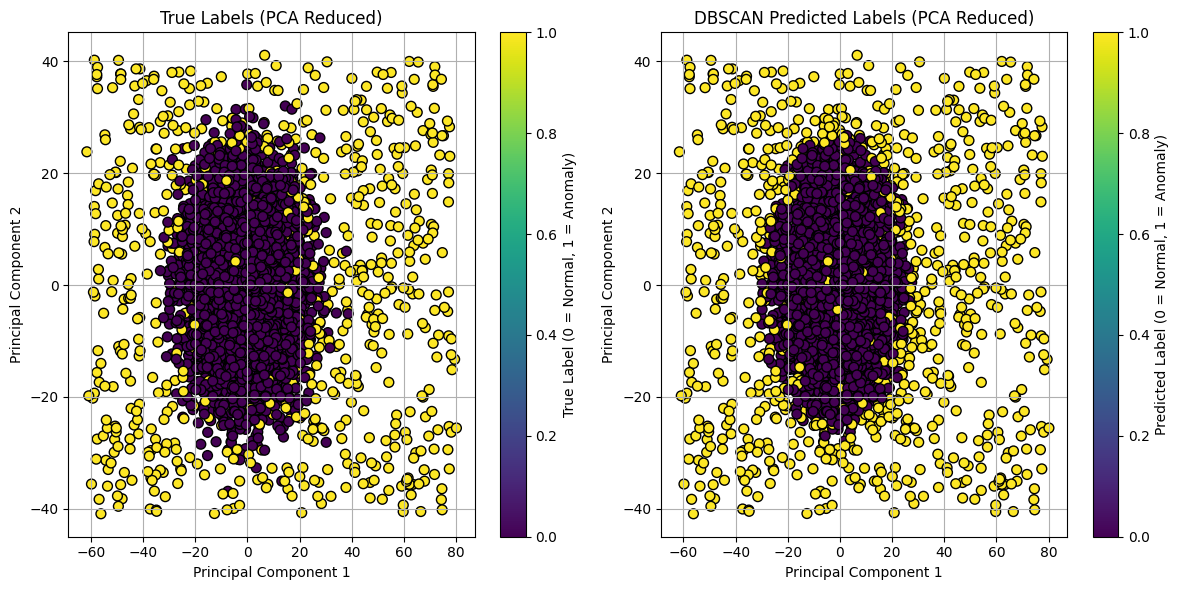

In [7]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters with true labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=50, edgecolors='k')
plt.title("True Labels (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='True Label (0 = Normal, 1 = Anomaly)')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50, edgecolors='k')
plt.title("DBSCAN Predicted Labels (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Predicted Label (0 = Normal, 1 = Anomaly)')
plt.grid()

plt.tight_layout()
plt.show()
